In [1]:
import random
import multiprocessing
import time
import matplotlib.pyplot as plt
import numpy as np
import psutil

In [2]:
def do_work():
    for _ in range(1000000):
        random.randint(1, 40) ** random.randint(1, 20)

In [3]:
%%time
do_work()

Wall time: 1.89 s


In [8]:
n_proc = list(range(1, 41))
time_list = []
proc_list = []
for i in n_proc:
    proc_list.append(i)
    start = time.time()
    procs = [multiprocessing.Process(target=do_work) for _ in range(i)]
    for proc in procs:
        proc.start()
    for proc in procs:
        proc.join()
    end = time.time()
    cur_time = end - start
    time_list.append(cur_time)
#print(time_list)
#print(proc_list)

In [6]:
x1 = psutil.cpu_count(logical = False)
x2 = psutil.cpu_count(logical = True)

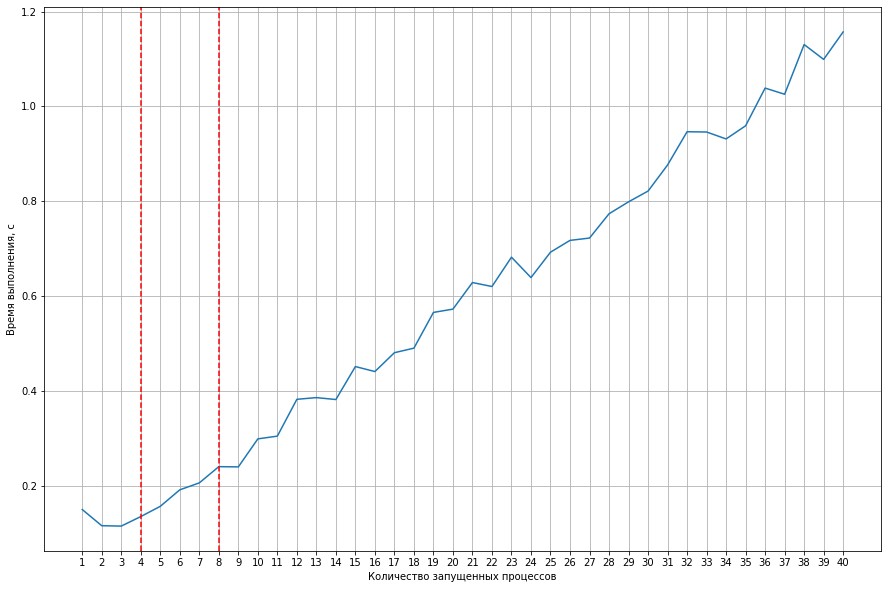

In [9]:
plt.figure(figsize=(15,10))
plt.plot(proc_list, time_list)
plt.xticks(np.arange(min(proc_list), max(proc_list)+1, 1.0))
plt.grid()
plt.axvline(x=x1, linestyle='--', color='r')
plt.axvline(x=x2, linestyle='--', color='r')
plt.xlabel("Количество запущенных процессов")
plt.ylabel("Время выполнения, с")
plt.show()

На графике изображена зависимость времени выполнения от числа запущенных процессов. Вертикальными линиями обозначены фактическое число ядер компьютера и число логических ядер. Когда мы запускаем до 4х процессов, условно, на каждое ядро идёт по одному потоку. Затем, когда их число доходит до 8, до максимального числа потоков, нагрузка на ядра увеличивается и растёт время исполнения процессов. 